In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [10]:
df = pd.read_csv('forestfires.csv', sep=',', header=0)
df['month'] = df['month'].map(lambda x: x.title())
df['month'] = pd.to_datetime(df['month'], format='%b')
df['month'] = df['month'].map(lambda x: x.month)
days = {'sun':1,'mon':2,'tue':3,'wed':4,'thu':5,'fri':6,'sat':7}
df['day'] = df['day'].map(lambda x:days[x])
df['log(area)'] = np.log(df['area']+1)

# Questions & Answers

1 Are there any obivous correlations between input variables?

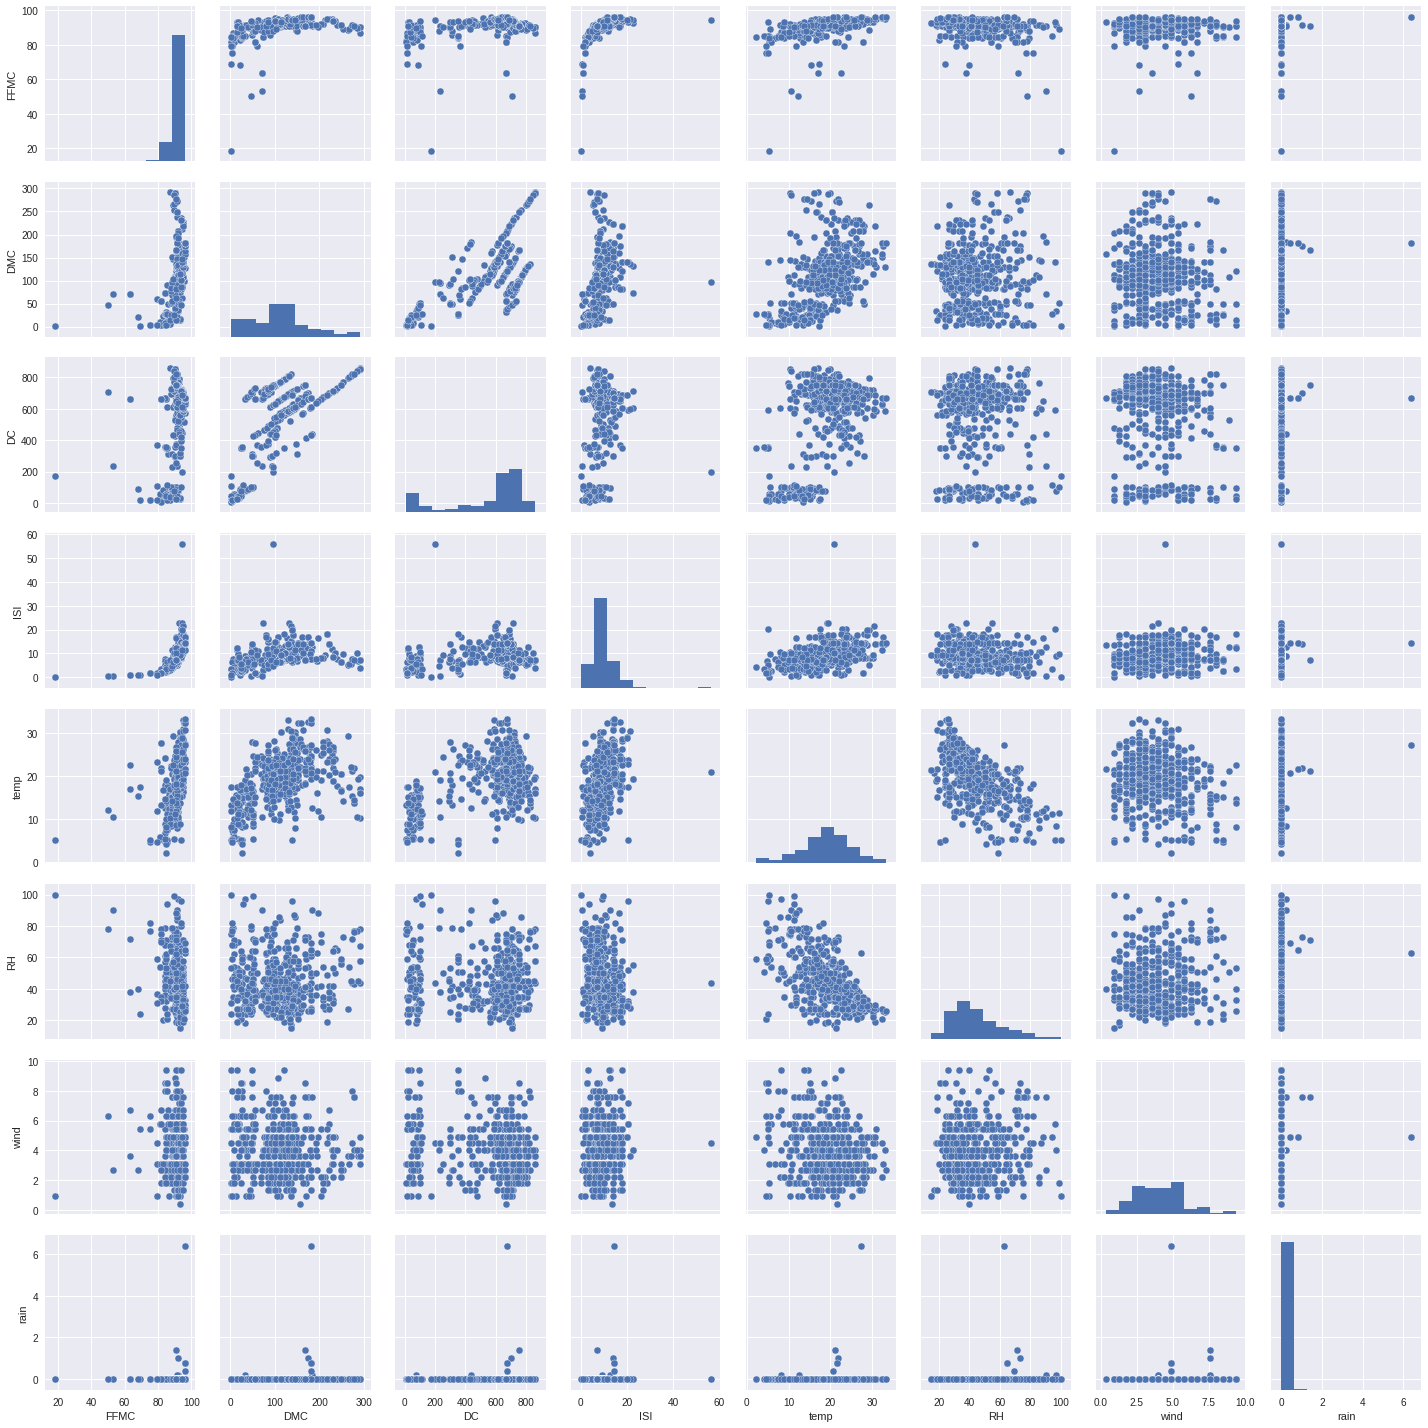

In [11]:
sns.pairplot(data=df, vars=list(df.columns[4:-2]))

___
### Background
FMC, DMC, and DC all take longer term rainfall and temperature averages into account to measure how dry the land is. They consider the past 16 hours, 12 days, and 52 days respectively. FMC and DMC also consider relative humidity. 
___

It seems quite clear that FFMC and ISI have some sort of hyperbolic relationship. This makes sense since FFMC is considered along with wind to calculate ISI.
___

DMC and DC are obviously calculated in a very similar way, and the difference is likely some integer value that represents relative humidity and rainfall over the long term. The step nature between the implied lines suggests this.
___

2 Are there any obvious linear relationships between any one input variable and the output?

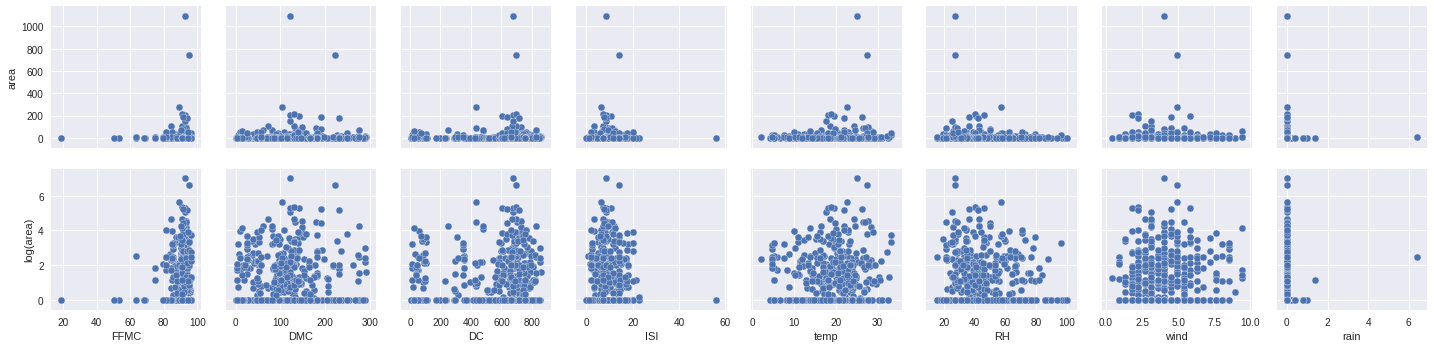

In [28]:
sns.pairplot(data=df,y_vars=list(df.columns[12:]), x_vars=list(df.columns[4:12]))

It looks perhaps like there are some loose correlations between acreage burned and FFMC, temp, RH, and wind. 
___

3 How are fires distributed throughout the year?

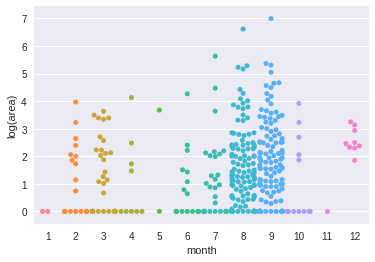

In [5]:
sns.swarmplot(x='month',y='log(area)', data=df)

There are many more fires in the Summer, but there are also a decent number in the late Winter/early Spring. Clearly, Summer fires also tend to be larger.

This leads me to wonder if the dryness is distributed in a similar way.

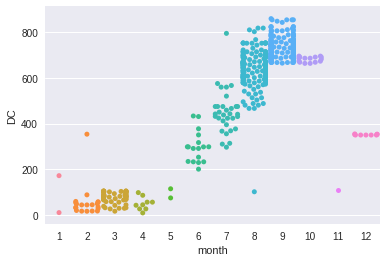

In [34]:
sns.swarmplot(x='month',y='DC', data=df)

The swarmplot showing DC by month strongly resembles the distribution of acreage burned by month. 
___